<a href="https://colab.research.google.com/github/sibi0620/Batch-7/blob/main/House_Price_Predictor_CSV_Only2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Forecasting in India (Single CSV Version)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score




In [5]:
# Load the dataset
df = pd.read_csv('india_housing_prices.csv')

# Select necessary columns
df = df[['State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs']]
df.dropna(inplace=True)



In [6]:
# Encode categorical features
le_state = LabelEncoder()
le_city = LabelEncoder()
le_locality = LabelEncoder()
le_property = LabelEncoder()

df['State'] = le_state.fit_transform(df['State'])
df['City'] = le_city.fit_transform(df['City'])
df['Locality'] = le_locality.fit_transform(df['Locality'])
df['Property_Type'] = le_property.fit_transform(df['Property_Type'])

In [9]:

# Prepare features and target
X = df.drop('Price_in_Lakhs', axis=1)
y = df['Price_in_Lakhs']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:

# Evaluation
y_pred = model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

RMSE: 145.85
R² Score: -0.07


In [15]:
# ... (rest of the code)

# Load the updated dataset
df = pd.read_csv('india_housing_prices.csv')  # Make sure the CSV contains 'Anna Nagar'

# ... (rest of the code)

# Re-fit the LabelEncoder for Locality
le_locality.fit(df['Locality'])

# ... (rest of the code)

# Retrain the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

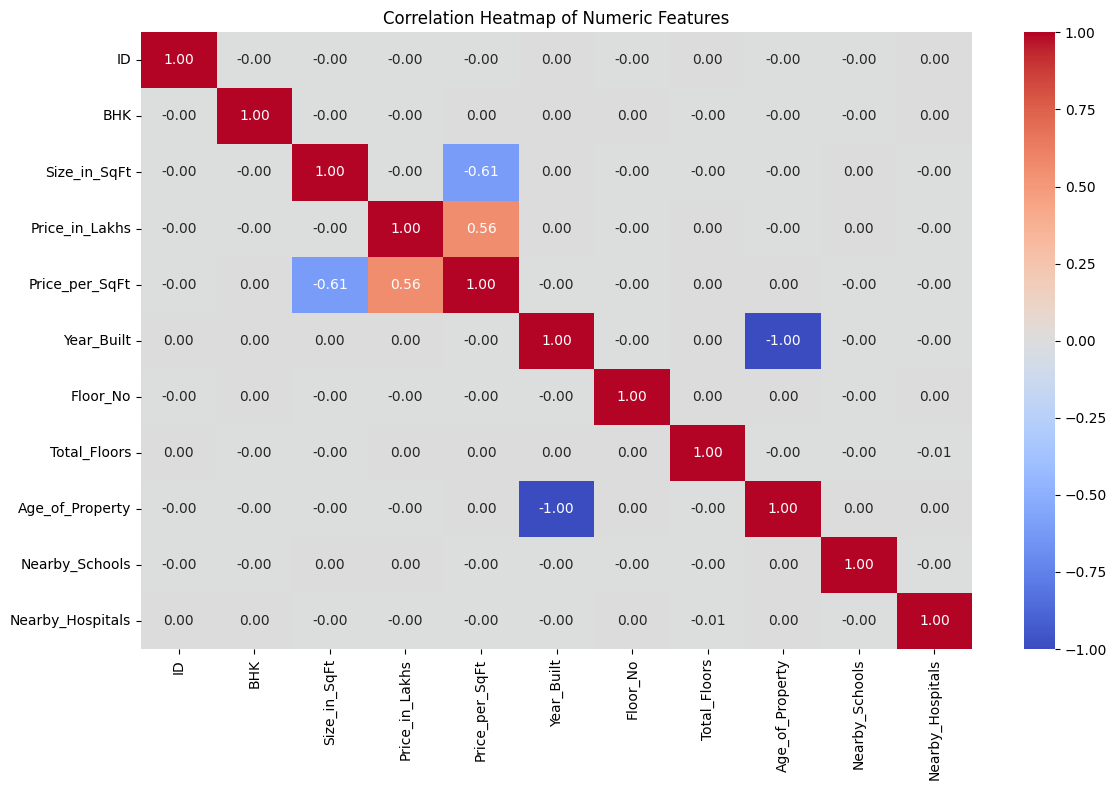

In [35]:
import os

# ... (rest of the code)

# Create the 'plots' directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png")
plt.show()

In [37]:
# Interactive Plot using Plotly
import plotly.express as px

# Assuming df is your original dataframe
city_price = df.groupby('City')['Price_in_Lakhs'].mean().sort_values(ascending=False).head(20)


fig = px.bar(city_price.reset_index(),
             x='City', y='Price_in_Lakhs',
             title='Top 20 Cities by Average House Price (Interactive)',
             labels={'Price_in_Lakhs': 'Average Price'},
             color='Price_in_Lakhs')
fig.write_html("plots/city_avg_price_interactive.html")
fig.show()

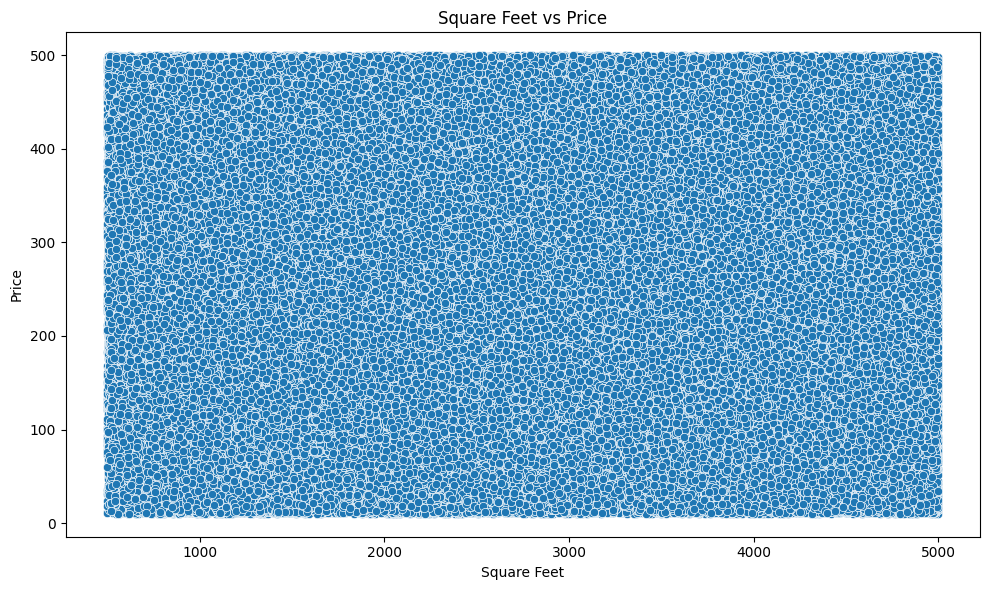

In [52]:
# Square feet vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size_in_SqFt', y='Price_in_Lakhs')
plt.title("Square Feet vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig("plots/sqft_vs_price.png")
plt.show()

<ipython-input-40-046f876ee25d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




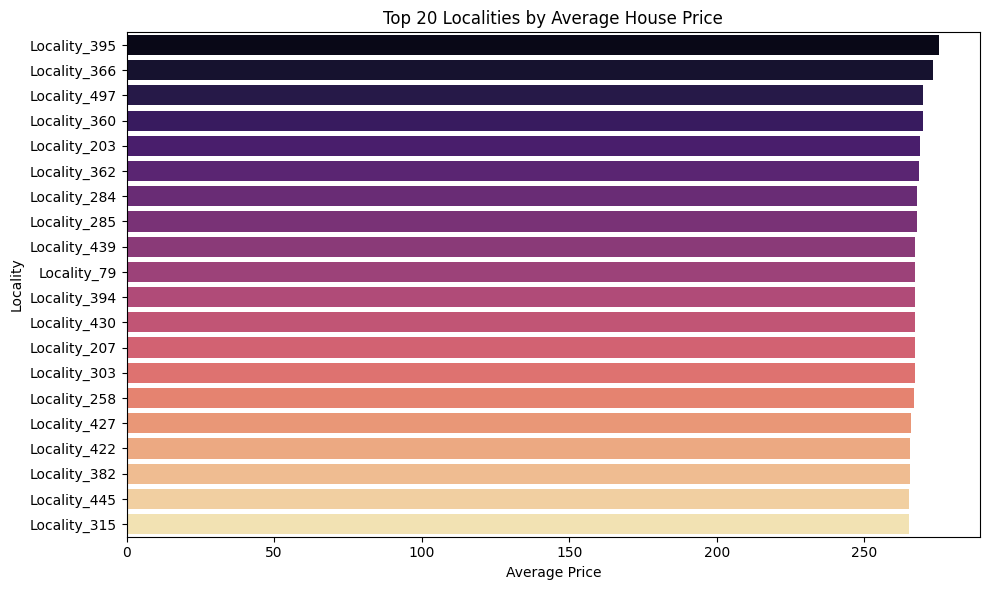

In [40]:
# Average price by Locality
locality_price = df.groupby('Locality')['Price_in_Lakhs'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=locality_price.values, y=locality_price.index, palette='magma')
plt.title("Top 20 Localities by Average House Price")
plt.xlabel("Average Price")
plt.ylabel("Locality")
plt.tight_layout()
plt.savefig("plots/locality_avg_price.png")
plt.show()

<ipython-input-46-096a1b0fa49a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




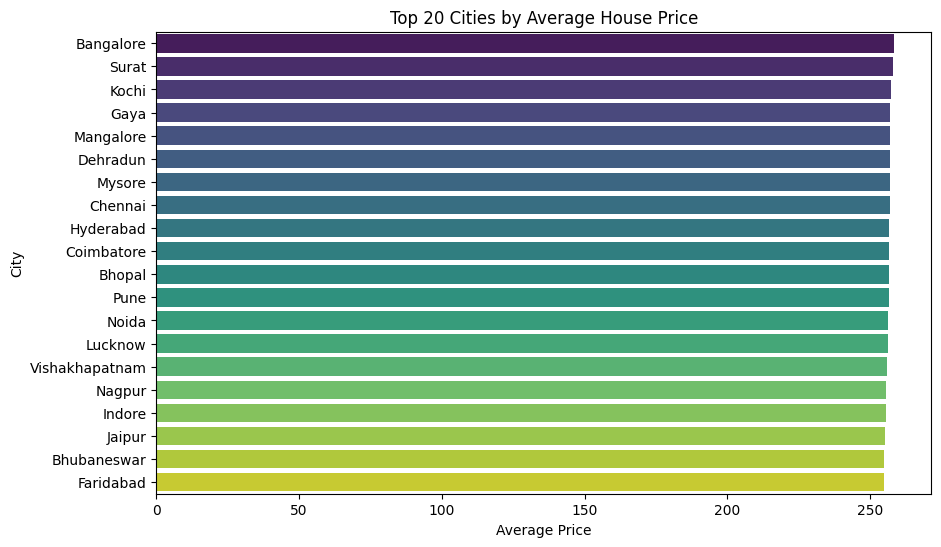

In [46]:

# Average price by City
city_price = df.groupby('City')['Price_in_Lakhs'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=city_price.values, y=city_price.index, palette='viridis')
plt.title("Top 20 Cities by Average House Price")
plt.xlabel("Average Price")
plt.ylabel("City")
plt.show()

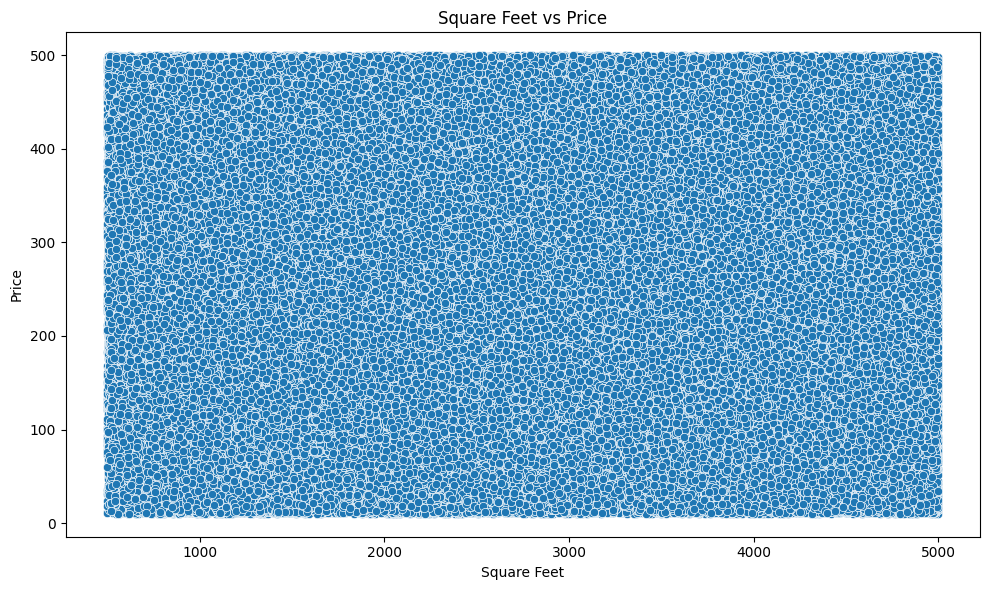

In [49]:
# Square feet vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size_in_SqFt', y='Price_in_Lakhs') # Changed 'Square_Feet' to 'Size_in_SqFt' and 'Price' to 'Price_in_Lakhs'
plt.title("Square Feet vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig("plots/sqft_vs_price.png")
plt.show() # Added the closing parenthesis

In [16]:
def predict_price(state, city, locality, property_type, bhk, sqft):
    try:
        # Check if locality is in training data
        if locality not in le_locality.classes_:
            return f"Prediction failed: Locality '{locality}' not found in training data."

        input_data = {
            'State': le_state.transform([state])[0],
            'City': le_city.transform([city])[0],
            'Locality': le_locality.transform([locality])[0],
            'Property_Type': le_property.transform([property_type])[0],
            'BHK': int(bhk),
            'Size_in_SqFt': int(sqft)
        }
        input_df = pd.DataFrame([input_data])
        prediction = model.predict(input_df)[0]
        return f"Estimated House Price: ₹{prediction:.2f} Lakhs"
    except Exception as e:
        return f"Prediction failed: {e}"

In [23]:

from locality_mapping import locality_mapping

# Example usage:
area = "Anna Nagar"
code = locality_mapping.get(area, "Unknown")
print(f"The code for {area} is {code}")

# Use mapped value
locality_input = 'Anna Nagar'
mapped_locality = locality_mapping.get(locality_input, 'Unknown')
if mapped_locality == 'Unknown':
    print(f"Error: '{locality_input}' not recognized.")
else:
    predict_price('Tamil Nadu', 'Chennai', mapped_locality, 'Apartment', 3, 1200)

The code for Anna Nagar is Locality_397


In [26]:
# Example prediction - replace these values with real data from the CSV
predict_price('Tamil Nadu', 'Chennai', 'Locality_397', 'Apartment', , 1200)

'Estimated House Price: ₹267.87 Lakhs'